# **COVID-19 Case Study or Analysis**

# Intorduction to COVID-19
<hr>
![COVID-19](https://techcrunch.com/wp-content/uploads/2020/02/coronavirus.jpg)
*Image Credits : [Scientific Animations](http://www.scientificanimations.com/wiki-images/) under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) license*
> **Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br>
**COVID-19** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on date 20 March 2020), this leads to a total of 10K+ Deaths across the globe, including *4K+ deaths* alone in *Europe*.<br>
Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the world. 

#### I will **update** this **notebook** *continuously* with new viz and updated data. 

<hr>
###  Please UPVOTE if you LIKE my EFFORT.
<hr>
### SOURSES: 
* [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)
* [CDC](https://www.cdc.gov/coronavirus/2019-nCoV/index.html)
* [Microsoft COVID-19 Tracker](https://www.bing.com/covid)
* [COVID-19 Tracker by Johns Hopkins University](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

<hr>
### Dataset 
https://github.com/CSSEGISandData/COVID-19 <br>
2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
<br>
This dataset is updated on daily basis by Johns Hopkins CSSE
<hr>
## Please don't PANIC, stay safe, follow the WHO, and your nation guidelines. We all can defeat this together. Please don't spread rumors.

# Content :
* [Intorduction to COVID-19](#Intorduction-to-COVID-19)
* [Imports and Datasets](#Imports-and-Datasets)
* [Preprocessing](#Preprocessing)
* [Defining Functions](#Defining-Functions)
* [General Analysis of Data](#General-Analysis-of-Data)
* [Correlation Analysis](#Correlation-Analysis)
* [Visualization on Map](#Visualization-on-Map)
* [COVID-19 Spread Analysis](#COVID-19-Spread-Analysis)
* <a href="#COVID-19-Case-(Confirmed,-Deaths,-Recovered-and-Active)-Percent-Split-in-Different-countries-(Pie-Viz)">COVID-19 Case (Confirmed, Deaths, Recovered and Active) Percent Split in Different countries (Pie Viz)</a>
* [COVID-19 Mortality Rate Variation Over Period of Time](#COVID-19-Mortality-Rate-Variation-Over-Period-of-Time)
* [Comparision of Mortality and Recovery Rate](#Comparision-of-Mortality-and-Recovery-Rate)
* [Cumulative Confirmed Cases and Cumulative Recovery Vs Cumulative Deaths Analysis ](#Cumulative-Confirmed-Cases-and-Cumulative-Recovery-Vs-Cumulative-Deaths-Analysis )
* [China Vs Outside China](#China-Vs-Outside-China)
* [Valuable Feedback](#Valuable-Feedback)

In [1]:
# Install pycountry_convert
!pip install pycountry_convert 
!pip install folium

# Imports and Datasets
<hr> 
* Pandas - for dataset handeling
* Numpy - Support for Pandas and calculations 
* Matplotlib - for visualization (Platting graphas)
* pycountry_convert - Library for getting continent (name) to from their country names
* folium - Library for Map

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime,date
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

### 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE ([LINK](https://github.com/CSSEGISandData/COVID-19)) <hr>
 Dataset consists of time-series data from 22 JAN 2020 to Till date (Updated on daily Basis).<br>
Three Time-series dataset :
* time_series_19-covid-Confirmed.csv[Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv))
* time_series_19-covid-Deaths.csv ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv))
* time_series_19-covid-Recovered.csv ([Link Raw File](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv))


In [3]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
df_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0,138.0,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086


# Preprocessing 
<hr>

In [5]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [6]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"

df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )   

In [7]:
df_deaths[df_deaths["continent" ]== 'Others']

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
134,NaN,Holy See,Others,41.9029,12.4534,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,Diamond Princess,Cruise Ship,Others,35.4437,139.6380,0,0,0,0,0,...,7,7,7,7,7,7,7,7,8,8
432,NaN,Kosovo,Others,42.6026,20.9030,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,NaN,East Timor,Others,-8.5500,125.5600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,NaN,Timor-Leste,Others,-8.8742,125.7275,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_active = df_confirmed.copy()
df_active.iloc[:,5:] = df_active.iloc[:,5:] - df_recovered.iloc[:,5:] - df_deaths.iloc[:,5:]
df_active.head(5)

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,Asia,15.0000,101.0000,2,3,5,7,6,...,39,46,78,111,135,169,229,279,368,554
1,NaN,Japan,Asia,36.0000,138.0000,2,1,2,2,3,...,564,633,699,654,705,716,745,739,740,811
2,NaN,Singapore,Asia,1.2833,103.8333,0,1,3,3,4,...,103,107,121,134,152,199,231,261,290,309
3,NaN,Nepal,Asia,28.1667,84.2500,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,NaN,Malaysia,Asia,2.5000,112.5000,0,0,0,3,4,...,171,203,386,524,622,728,823,940,1065,1157


In [9]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_recovered = df_recovered.replace(np.nan, '', regex=True)
df_active = df_active.replace(np.nan, '', regex=True)

 # Defining Functions
 <hr>
* plot_params()
* visualize_covid_cases()
* get_mortality_rate()

In [10]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, recovered, active, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recovered,active]
    label = ["Confirmed", "Deaths", "Recoverd","Active"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]

    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")")

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        active = Total_confirmed - Total_recovered - Total_deaths
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recovered = np.sum(np.asarray(stats[2][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        active = Total_confirmed - Total_recovered - Total_deaths
        
    text = "From "+stats[0].columns[4]+" to "+stats[0].columns[-2]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=14, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[0]+" "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 13)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

# General Analysis of Data
<hr>
Getting country wise and continent wise data.

In [11]:
# getting country wise data
confirmed_cases =  df_confirmed.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
recovered_cases = df_recovered.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
deaths = df_deaths.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
active_cases = df_active.groupby(["country"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]

confirmed_cases.name = "Confirmed Cases"
recovered_cases.name = "Recovered Cases"
deaths.name = "Deaths Reported"
active_cases.name = "Active Cases"
df_countries_cases = pd.DataFrame([confirmed_cases,recovered_cases,deaths,active_cases]).transpose()

# getting continent wise data
confirmed_cases =  df_confirmed.groupby(["continent"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
recovered_cases = df_recovered.groupby(["continent"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
deaths = df_deaths.groupby(["continent"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]
active_cases = df_active.groupby(["continent"]).sum().drop(['Lat','Long'],axis =1).iloc[:,-1]

confirmed_cases.name = "Confirmed Cases"
recovered_cases.name = "Recovered Cases"
deaths.name = "Deaths Reported"
active_cases.name = "Active Cases"
df_continents_cases = pd.DataFrame([confirmed_cases,recovered_cases,deaths,active_cases]).transpose()

### Global Reported Cases till Date
Total number of confirmed cases, deaths reported, revoveries and active cases all across the world

In [12]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='Wistia',axis=1)

,Confirmed Cases,Recovered Cases,Deaths Reported,Active Cases
0,335955,97704,14632,223619


### Coninent Wise Reported Cases 
Coninent Wise reported confirmed cases, recovered cases, deaths, active cases

In [13]:
df_continents_cases.style.background_gradient(cmap='Wistia')

,Confirmed Cases,Recovered Cases,Deaths Reported,Active Cases
continent,,,,
Africa,1429,143,47,1239
Asia,123233,84299,5258,33676
Australia,1383,88,7,1288
Europe,169314,12795,8807,147712
North America,35783,19,452,35312
Others,717,325,8,384
South America,4096,35,53,4008


### Country Wise Reported Cases
Country Wise reported confirmed cases, recovered cases, deaths, active cases

In [14]:
df_countries_cases.sort_values('Confirmed Cases', ascending= False).style.background_gradient(cmap='Wistia')


,Confirmed Cases,Recovered Cases,Deaths Reported,Active Cases
country,,,,
China,81397,72362,3265,5770
Italy,59138,7024,5476,46638
USA,33272,0,417,32855
Spain,28768,2575,1772,24421
Germany,24873,266,94,24513
Iran,21638,7931,1685,12022
France,16176,2206,674,13296
South Korea,8897,2909,104,5884
Switzerland,7245,131,98,7016


### Top 10 countries (Confirmed Cases and Deaths)

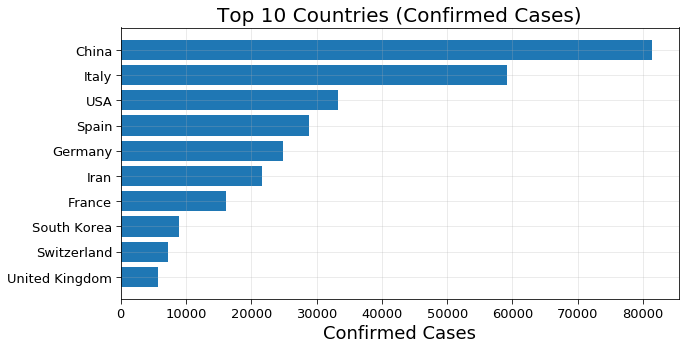

In [15]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].index[-10:],df_countries_cases.sort_values('Confirmed Cases')["Confirmed Cases"].values[-10:],)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.savefig('Top 10 Countries (Confirmed Cases).png')
plt.grid(alpha=0.3)

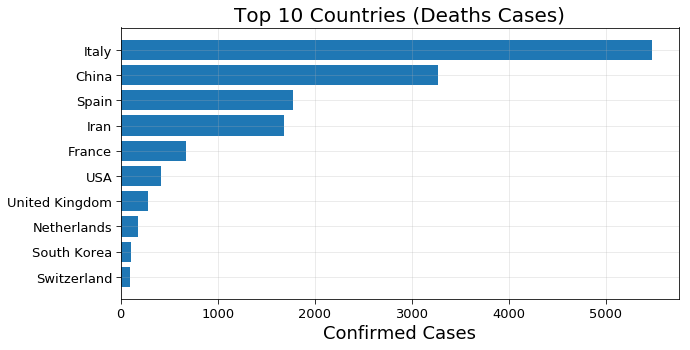

In [16]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Deaths Reported')["Deaths Reported"].index[-10:],df_countries_cases.sort_values('Deaths Reported')["Deaths Reported"].values[-10:])
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.savefig('Top 10 Countries (Deaths Cases).png')
plt.grid(alpha=0.3)

# Correlation Analysis
<hr>
Plotting Heat map of correlation of confirmed cases, recovered cases, deaths and active cases.

### Country wise Correlation

In [17]:
df_countries_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed Cases,Recovered Cases,Deaths Reported,Active Cases
Confirmed Cases,1,0.774194,0.878428,0.752373
Recovered Cases,0.774194,1,0.577881,0.166492
Deaths Reported,0.878428,0.577881,1,0.746962
Active Cases,0.752373,0.166492,0.746962,1


### Continent Wise Correlation

In [18]:
df_continents_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed Cases,Recovered Cases,Deaths Reported,Active Cases
Confirmed Cases,1,0.600774,0.98601,0.8853
Recovered Cases,0.600774,1,0.529036,0.1602
Deaths Reported,0.98601,0.529036,1,0.908324
Active Cases,0.8853,0.1602,0.908324,1


# Visualization on Map
<hr>

In [19]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #555;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Recovered   "+str(df_recovered.iloc[i,-1])+"</li>"+
        "<li>Active   "+str(df_active.iloc[i,-1])+"</li>"+
        "<li>Deaths   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


# COVID-19 Spread Analysis
<hr>

Spread Analysis is in two sections 
1. Spread Across Globe
2. Spread Trends in the World, Continents and few most affected Countries

## 1. Spread Across Globe 
<hr> 
### Number of countries affected over the time

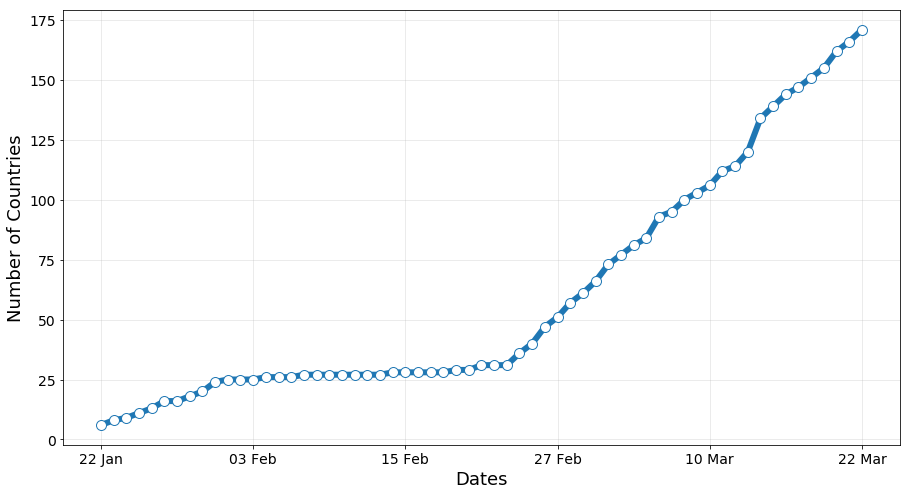

In [20]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)

marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d)-1,int(len(d)/5)))+[len(d)-1],d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries",fontsize=18)
plt.savefig('spread.png')

plt.grid(alpha = 0.3)

### Date on which Countries gets its first COVID-19 Case : Epedemic Span (Gantt Chart)

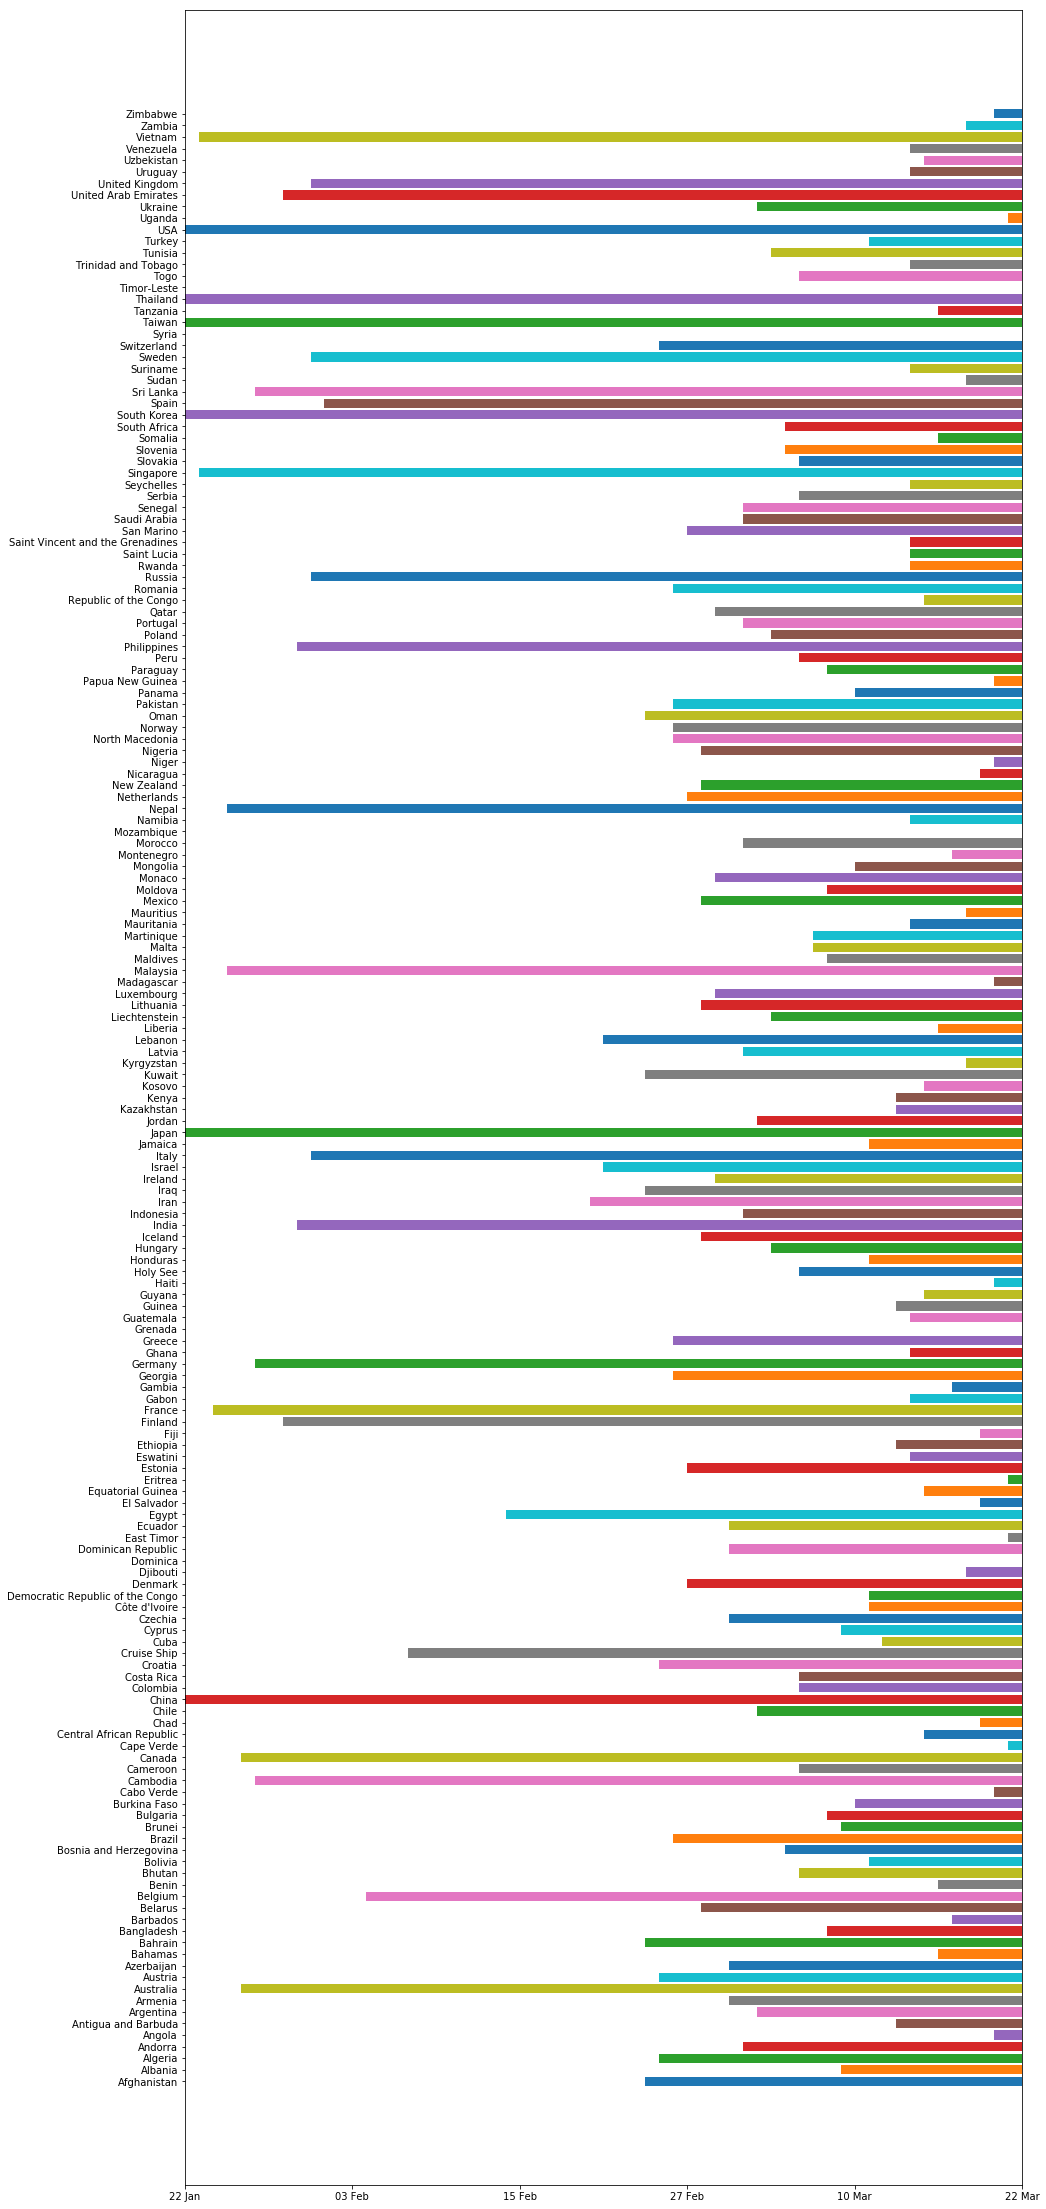

In [21]:
c = df_active.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: [dd(x[x > 0].index[0] , x.index[0]),dd(x[x > 0].index[-1] , x.index[0])], axis =1)
c[c.index == "Nepal"]

plt.figure(figsize=(15,40))
for i,country in enumerate(c):
    plt.barh(0+i,country[1] - country[0],left = country[0])
# plt.tick_params(labelsize = 12)
plt.xticks(list(np.arange(0,len(d)-1,int(len(d)/5)))+[len(d)-1],d[:-1:int(len(d)/5)]+[d[-1]])
plt.yticks(np.arange(0,len(c)),c.index)
f.tight_layout()
plt.show()

##  2. Spread Trends in the World, Continents and few most affected Countries
<hr>
1. COVID-19 Global Spread Trends
2. COVID-19 Spread Trends in Different Continents
3. COVID-19 Spread Trends in Few Most Affected Countries
4. COVID-19 Spread Comparison of few most affected countries


### 1. COVID-19 Global Spread Trends
<h>
This graph shows the confirmed, deaths, recovered and active caes trends over the world.


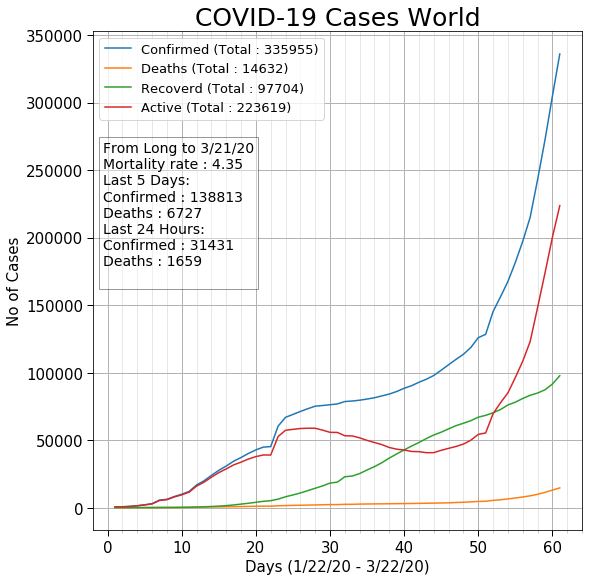

In [22]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(df_confirmed, df_deaths,df_recovered,df_active,continent = "All",figure = [f,rows,cols, 1])

plt.savefig('COIVD-19-World.png')

plt.show()

### 2 . COVID-19 Spread Trends in Different Continents

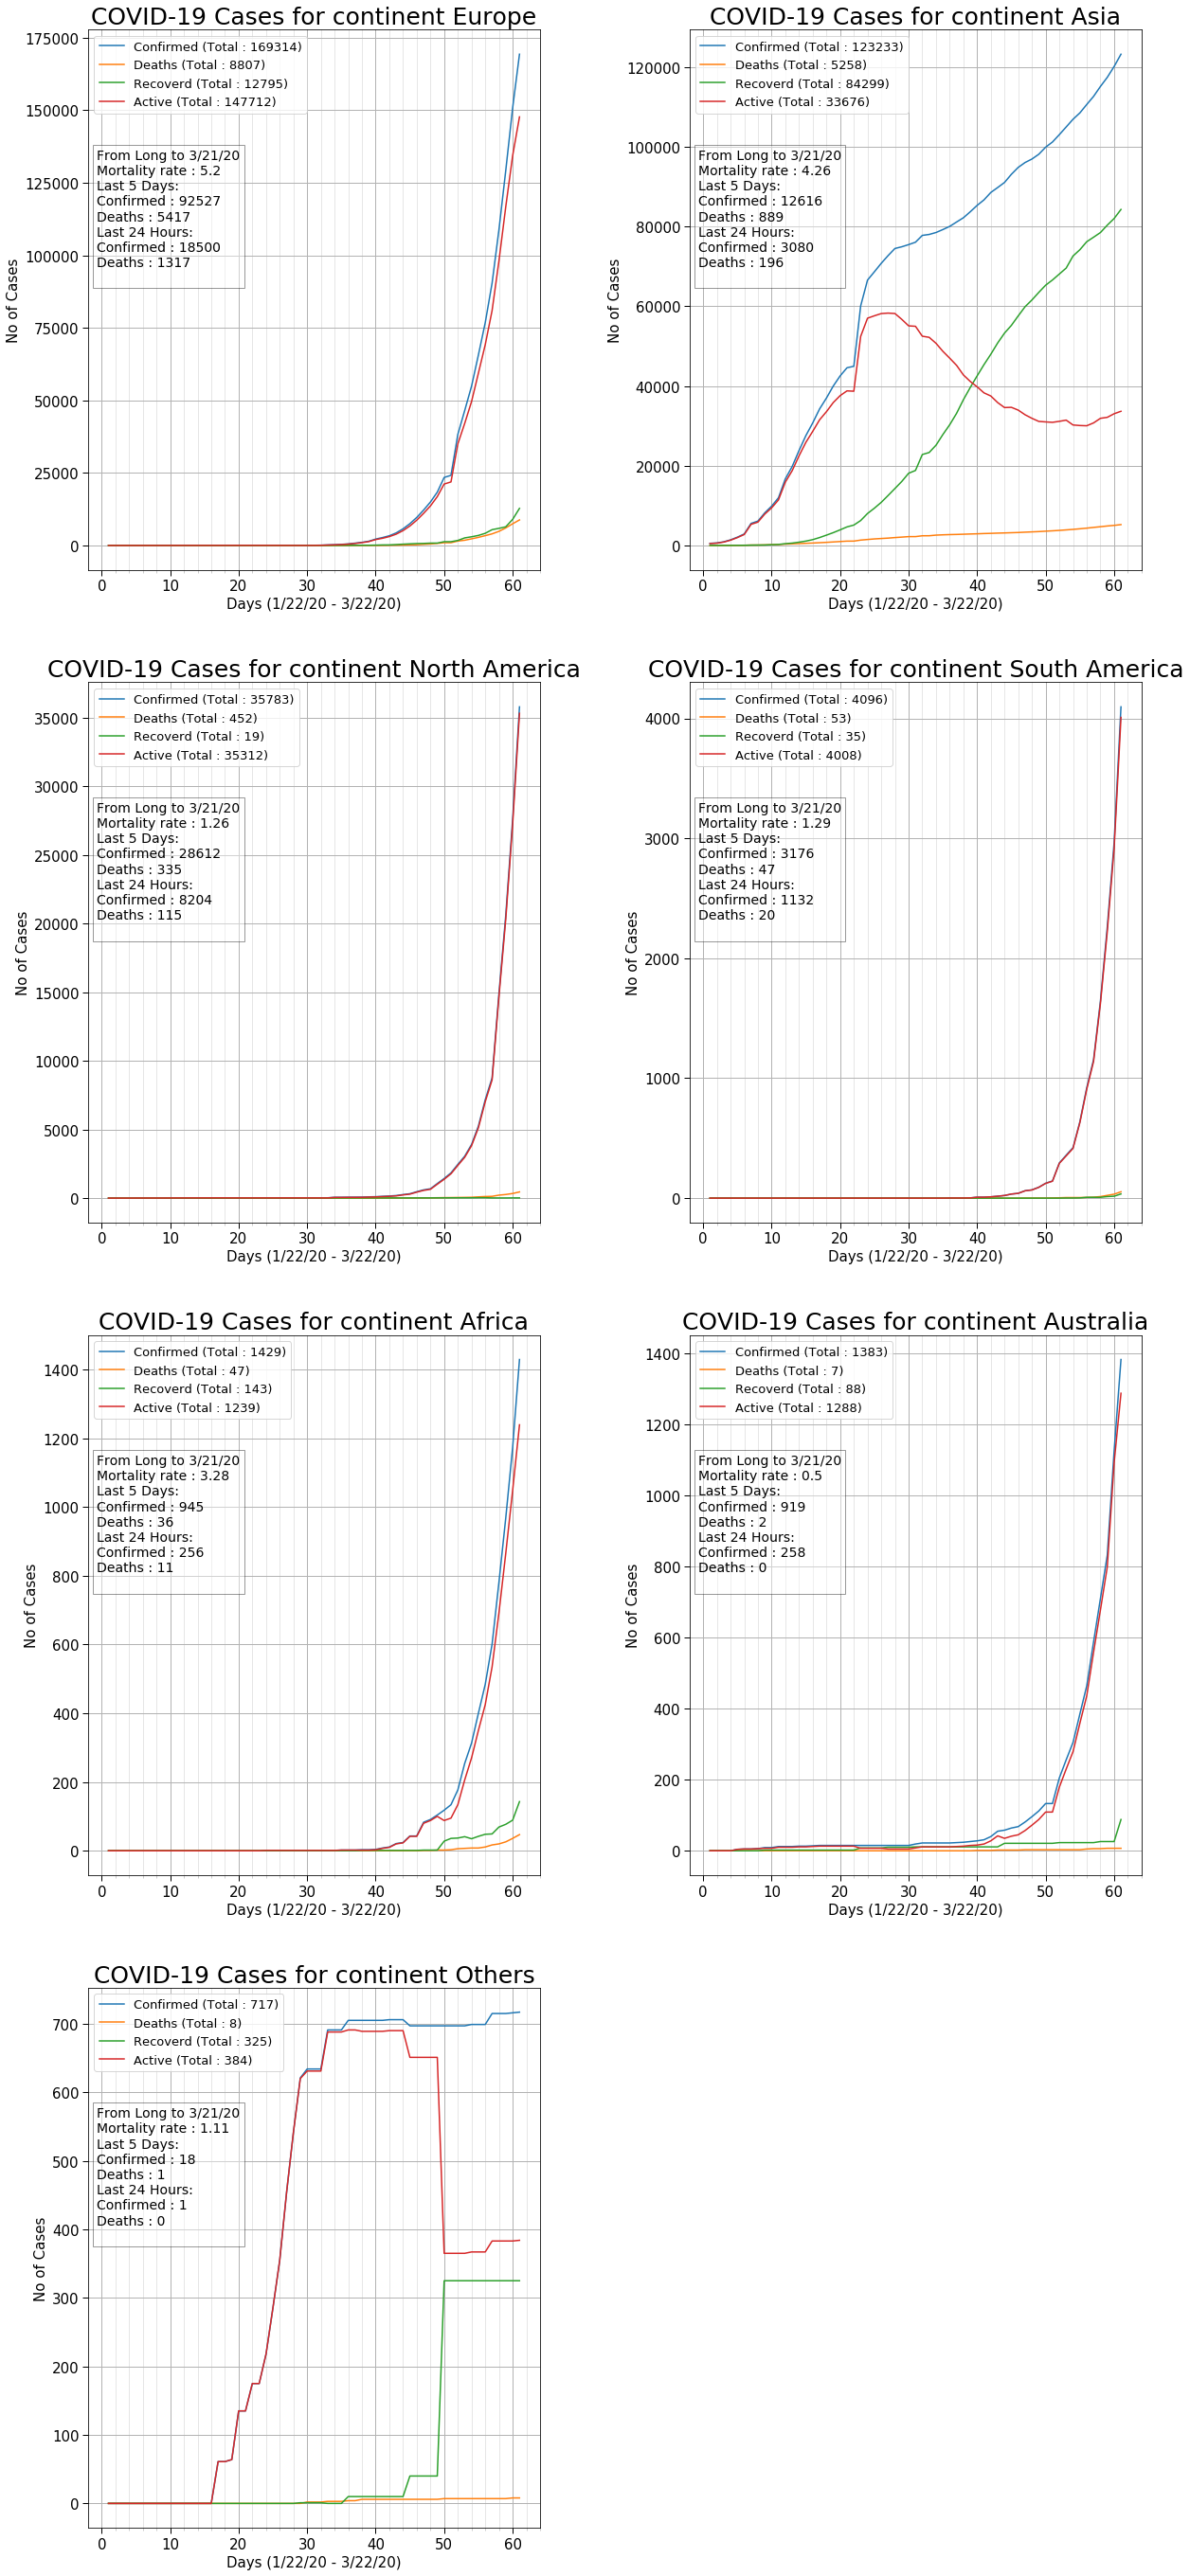

In [23]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,10*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths,df_recovered, df_active, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

### 3. COVID-19 Spread Trends in Few Most Affected Countries

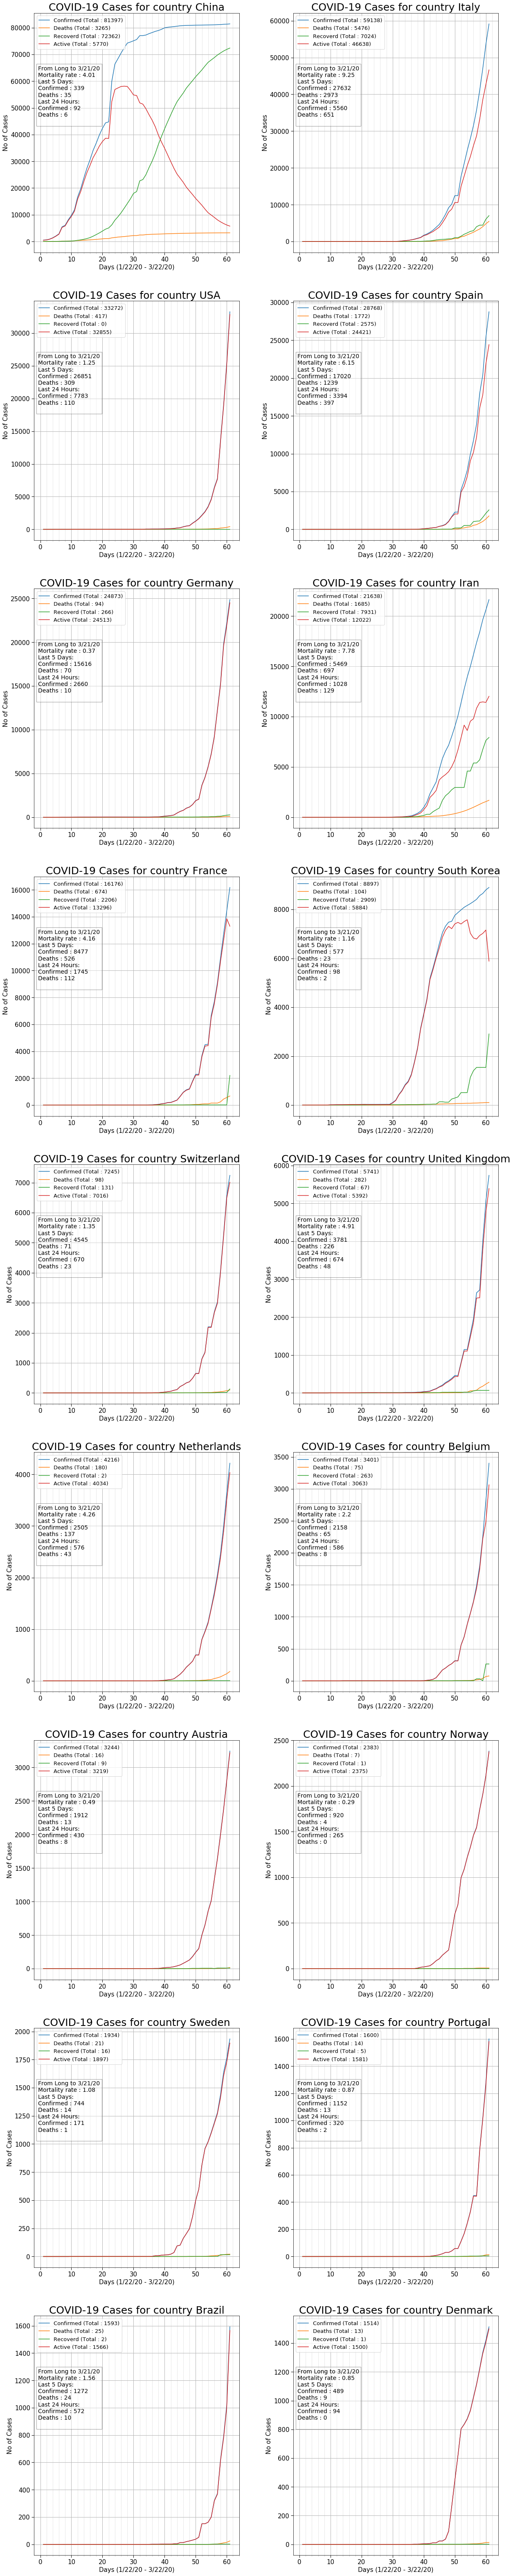

In [24]:
df_countries = df_confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 1500].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,10*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,df_recovered,df_active,country = country,figure = [f,rows,cols, i+1])

plt.show()

### 4. COVID-19 Spread Comparison of few most affected countries and INDIA

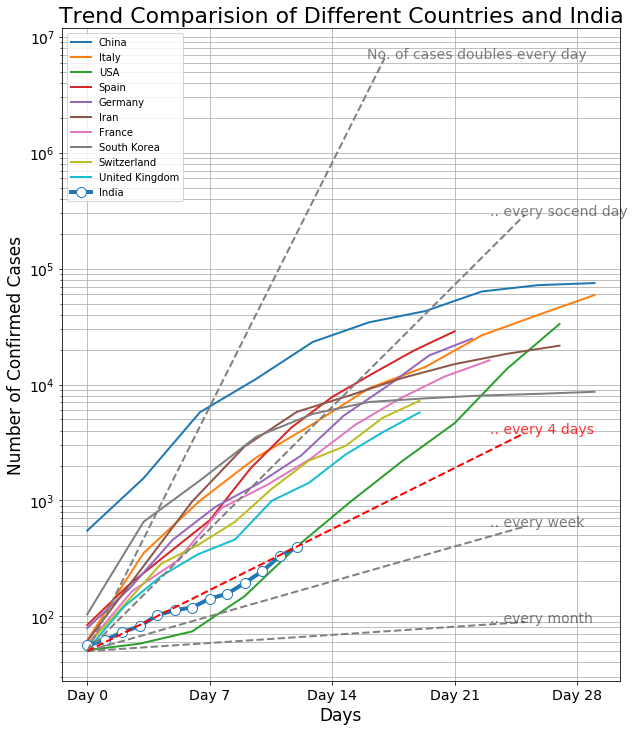

In [25]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(10,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        if country != "India":
            continue
    x = 30
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:x]
     
    date = np.arange(0,len(t[:x]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    if country != "India":
        plt.plot(xnew,power_smooth,label = country,linewidth =2)
    else:
        marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
        plt.plot(date,t,"-.",label = country,**marker_style)

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,30,7),[ "Day "+str(i) for i in range(30)][::7])     

# Reference lines 
x = np.arange(0,18)
y = 2**(x+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate("No. of cases doubles every day",(x[-2],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/2+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every socend day",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/7+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every week",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)

x = np.arange(0,26)
y = 2**(x/30+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "gray")
plt.annotate(".. every month",(x[-3],y[-1]),xycoords="data",fontsize=14,alpha = 0.5)


# India is following trend similar to doulbe the cases in 4 days but it may increase the rate 
x = np.arange(0,26)
y = 2**(x/4+np.log2(threshold))
plt.plot(x,y,"--",linewidth =2,color = "Red")
plt.annotate(".. every 4 days",(x[-3],y[-1]),color="Red",xycoords="data",fontsize=14,alpha = 0.8)

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparision of Different Countries and India",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")
plt.savefig('Trend Comparision with India.png')
plt.show()

# COVID-19 Case (Confirmed, Deaths, Recovered and Active) Percent Split in Different countries (Pie Viz)
<hr>
These pie plots are showing the proportion of the spread of this Pandemic across the world. Each pie is showing a few major contributor countries, and rest countries are shown as "Others". Criteria : 
* Confirmed Cases: Any countries reported more than 1500 confirmed cases are shown the rest of the countries are under "others" Category.
* Deaths: Any Countries reported more than 40 deaths are shown rest of the countries are under "others" Category.
* Active Cases: Any Countries reported more than 1000 active cases are shown the rest of the countries are under "others" Category.
* Recovered Cases: Any Countries reported more than 200 recoveries are shown rest of the countries are under "others" Category.

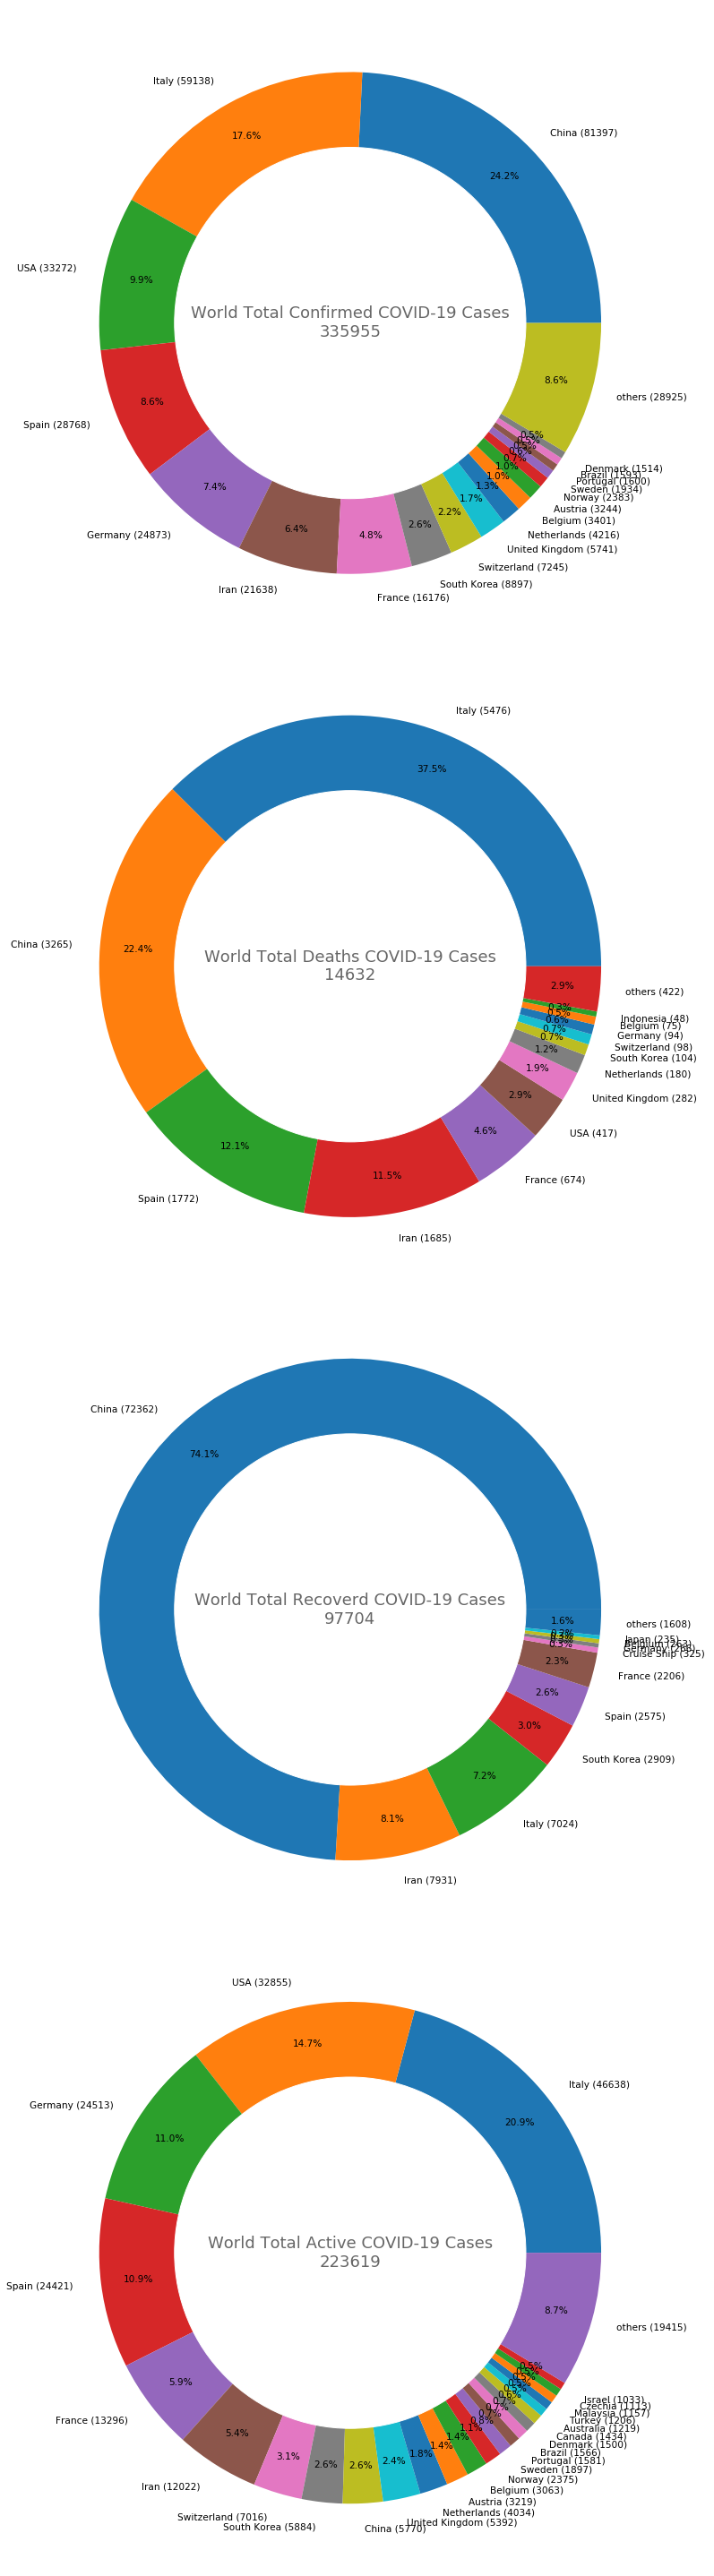

In [26]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [df_confirmed,df_deaths,df_recovered, df_active]
label = ["Confirmed","Deaths","Recoverd","Active"]
threshold = [1500,40,200,1000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(get_total_cases(stat)), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()


# COVID-19 Mortality Rate Variation Over Period of Time
<hr>
For any epidemic the one of the most important evaluation is Mortality Rate. It is the measure of number of deaths in a particular population during a specific interval.
* 1st curve shows how the mortality rate varies from 22 JAN 2020 to till date all over the world. 
* 2nd Curve shows the variation of mortality rate in different continents over time.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


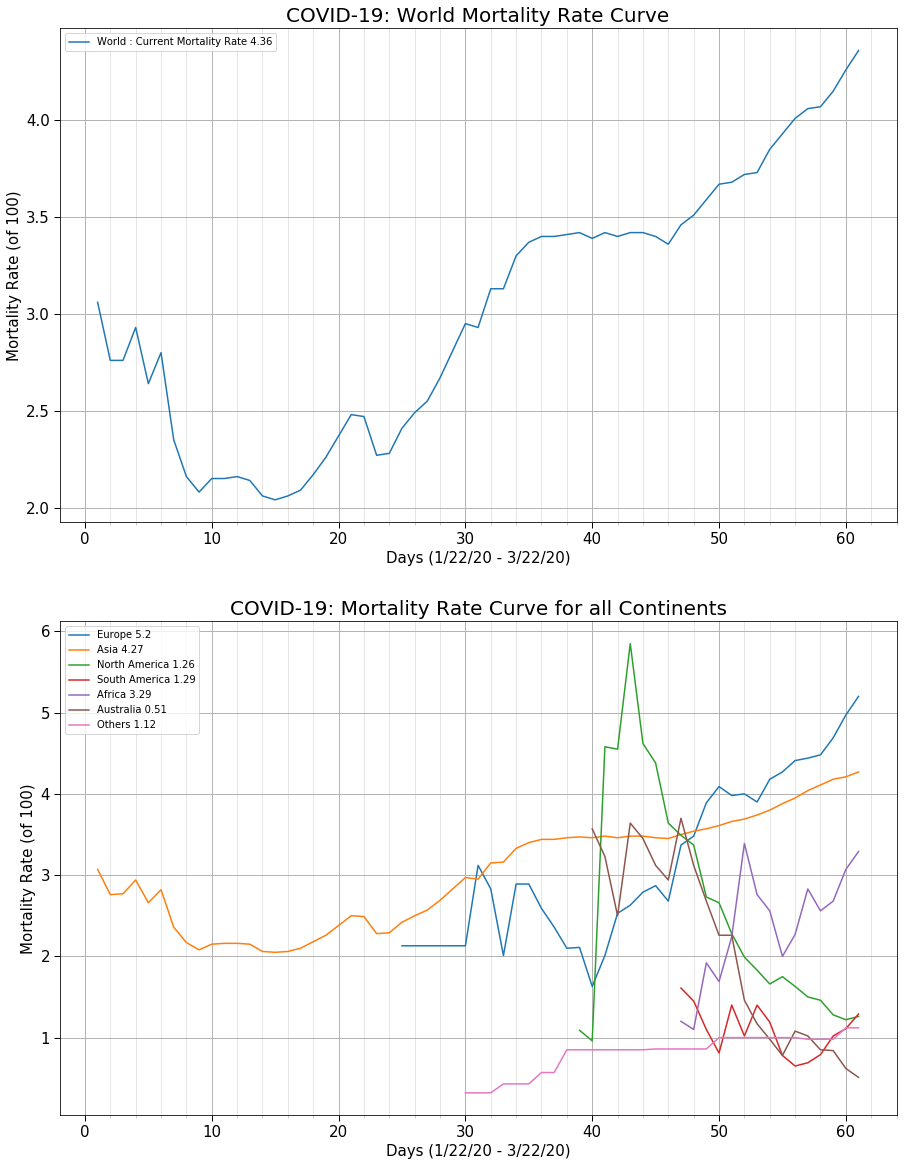

In [27]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =1
rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]))

plt_title = "COVID-19: World Mortality Rate Curve"
plot_params(ax,axis_label,plt_title)
# Legend Location
l = plt.legend(loc= "best")


#SubPlot 2
ax = f.add_subplot(212)
for i, continent in enumerate(continents[1:]):
    mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continent)
    plt.plot(np.arange(1+mortality_rate[mortality_rate == 0].shape[0],mortality_rate[mortality_rate == 0].shape[0]+mortality_rate[mortality_rate > 0].shape[0]+1),mortality_rate[mortality_rate > 0],label = continents[i+1]+" "+str(mortality_rate[-1]))

plt_title = "COVID-19: Mortality Rate Curve for all Continents"
plot_params(ax,axis_label,plt_title)

# Legend Location
l = plt.legend(loc= "best")

plt.savefig('Mortality rate.png')
plt.show()


# Comparision of Mortality and Recovery Rate
<hr>
In any Epidemic or Pandemic, the study of Mortality Rate and Recovery Rate has an important role. This plot compares the variation of MR and RR over time through the World. 

**Scale : LOG**

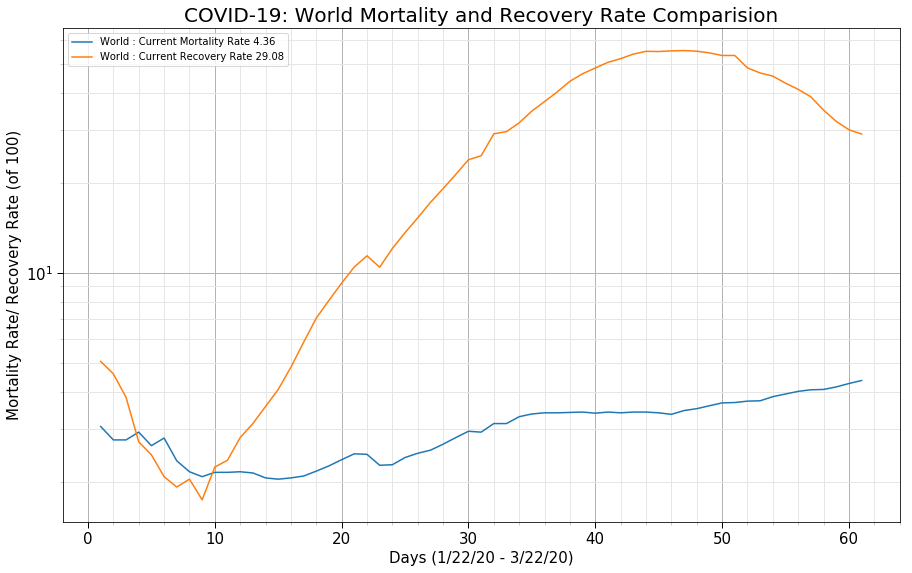

In [28]:
cols =1
rows = 2
axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","Mortality Rate/ Recovery Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
recovered_rate = get_mortality_rate(df_confirmed,df_recovered,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]))
plt.plot(np.arange(1,recovered_rate.shape[0]+1),recovered_rate,label = "World : Current Recovery Rate "+str(recovered_rate[-1]))

plt_title = "COVID-19: World Mortality and Recovery Rate Comparision"
plot_params(ax,axis_label,plt_title,scale = "log")
# Legend Location
l = plt.legend(loc= "best")

# Cumulative Confirmed Cases and Cumulative Recovery Vs Cumulative Deaths Analysis 
<hr>
The variation of Cumulative Confirmed Cases and Cumulative Recovery with Cumulative Deaths can show a trend. These 2 curves depict the same. Also, these curves should be a straight line as shown in the 1st curve, but the 2nd curve is not showing that trend, and as the number of recovered cases is increasing, death is increasing at a faster rate.
* 1st curve: Cumulative Confirmed Cases VS Cumulative Deaths 
* 2nd curve: Cululative Recovery VS Cumulative Deaths

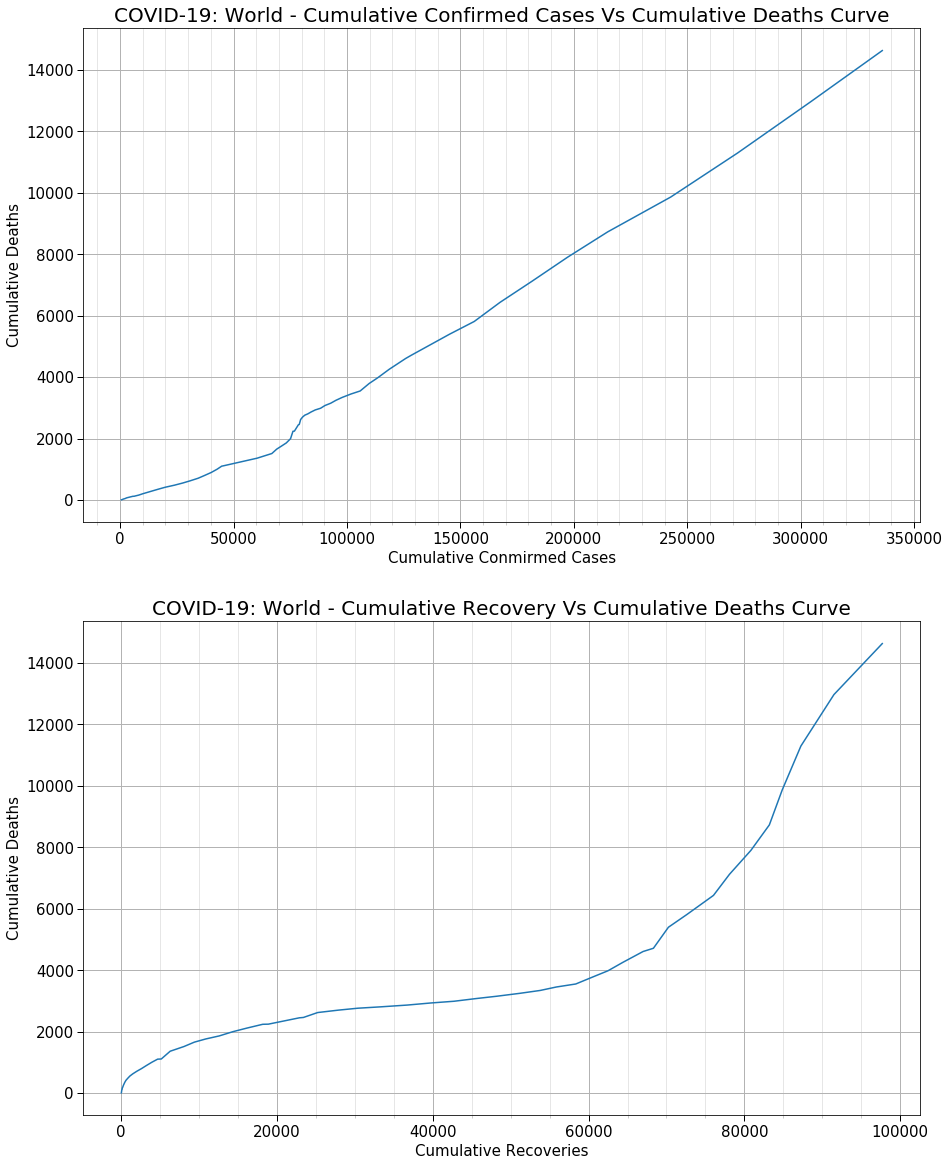

In [29]:
cols =1
rows = 2

f = plt.figure(figsize=(15,10*rows))

# SubPlot 1
ax = f.add_subplot(211)
plt.plot(np.sum(np.asarray(df_confirmed.iloc[:,5:]),axis = 0),np.sum(np.asarray(df_deaths.iloc[:,5:]),axis = 0))

axis_label = ["Cumulative Conmirmed Cases","Cumulative Deaths"]
plt_title = "COVID-19: World - Cumulative Confirmed Cases Vs Cumulative Deaths Curve"
plot_params(ax,axis_label,plt_title)


# SubPlot 2
ax = f.add_subplot(212)
mortality_rate = get_mortality_rate(df_confirmed,df_deaths,continent=continents[0])
plt.plot(np.sum(np.asarray(df_recovered.iloc[:,5:]),axis = 0),np.sum(np.asarray(df_deaths.iloc[:,5:]),axis = 0))

axis_label = ["Cumulative Recoveries","Cumulative Deaths"]
plt_title = "COVID-19: World - Cumulative Recovery Vs Cumulative Deaths Curve"

plot_params(ax,axis_label,plt_title)
plt.show()

# China Vs Outside China

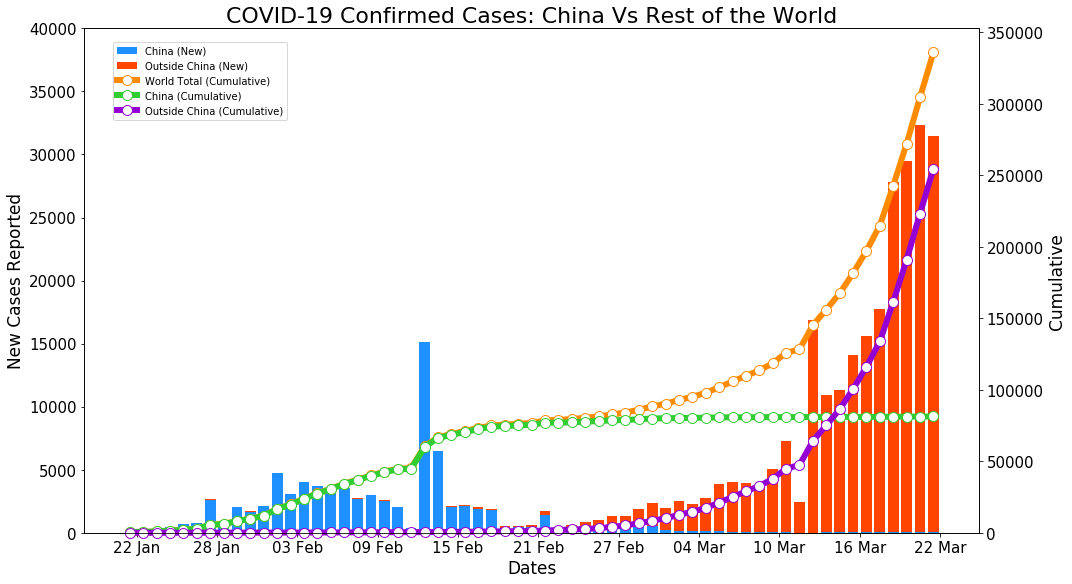

In [30]:
# Getting data for China and Oouside China
# df - Cumulative data for china, outside china and world total  (confirmed cases)
# df_newcases- new cases reported per day  (confirmed cases)
df_confirmed_report = df_confirmed.copy()
df_confirmed_report.loc[df_confirmed_report['country'] != "China","country"] = "Outside China"
df_confirmed_report = df_confirmed_report.groupby("country").sum().drop(["Lat","Long"],axis =1)
df_confirmed_report.loc["Total"] = df_confirmed_report.sum()
df_confirmed_newcases = df_confirmed_report.groupby(level =0).diff(axis =1)

f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(111)

ax1.bar(df_confirmed_report[df_confirmed_report.index == "China"].columns,df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0], label = "China (New)",color='dodgerblue')
ax1.bar(df_confirmed_report[df_confirmed_report.index == "Outside China"].columns,df_confirmed_newcases[df_confirmed_newcases.index == "Outside China"].values[0],bottom=df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax1.set_xlabel("Dates",fontsize=17)
ax1.set_ylabel("New Cases Reported",fontsize =17)

ax1.tick_params(labelsize=15)
ax1.set_xticks(np.arange(0.5, len(df_confirmed_report.columns), 6))
ax1.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_report.columns][::6],fontsize=15)
ax1.set_yticks(np.arange(0, df_confirmed_report.max(axis = 1)[2]/10+10000, 5000))
# ax1.spines['bottom'].set_position('zero')

ax2 = ax1.twinx()
marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')

ax2.plot(df_confirmed_report[df_confirmed_report.index == "Total"].columns ,df_confirmed_report[df_confirmed_report.index == "Total"].values[0],**marker_style,label = "World Total (Cumulative)",color="darkorange",clip_on=False)
ax2.plot(df_confirmed_report[df_confirmed_report.index == "China"].columns ,df_confirmed_report[df_confirmed_report.index == "China"].values[0],**marker_style,label = "China (Cumulative)",color="limegreen",clip_on=False)
ax2.plot(df_confirmed_report[df_confirmed_report.index == "Outside China"].columns ,df_confirmed_report[df_confirmed_report.index == "Outside China"].values[0],**marker_style,label ="Outside China (Cumulative)",color="darkviolet",clip_on=False)
ax2.bar([0],[0])

# Label
ax2.tick_params(labelsize=15)
ax2.set_ylabel("Cumulative",fontsize =17)
ax2.set_xticks(np.arange(0.5, len(df_confirmed_report.columns), 6))
ax2.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_report.columns][::6])
ax2.set_yticks(np.arange(0, df_confirmed_report.max(axis = 1)[2]+50000, 50000))

f.tight_layout()
f.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Confirmed Cases: China Vs Rest of the World",fontsize = 22)
plt.savefig('China vs Rest of the world.png')
plt.show()

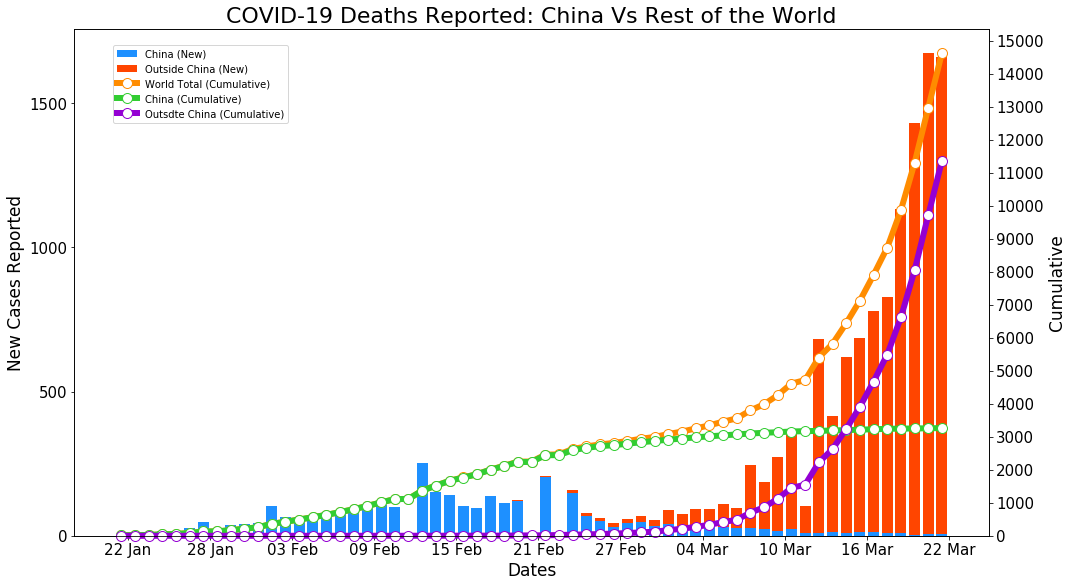

In [31]:
# Getting data for China and Oouside China
# df - Cumulative data for china, outside china and world total (deaths)
# df_newcases- new cases reported per day (deaths)
df_deaths_report = df_deaths.copy()
df_deaths_report.loc[df_deaths_report['country'] != "China","country"] = "Outside China"
df_deaths_report = df_deaths_report.groupby("country").sum().drop(["Lat","Long"],axis =1)
df_deaths_report.loc["Total"] = df_deaths_report.sum()
df_deaths_newcases = df_deaths_report.groupby(level =0).diff(axis =1)

f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(111)

ax1.bar(df_deaths_report[df_deaths_report.index == "China"].columns,df_deaths_newcases[df_deaths_newcases.index == "China"].values[0], label = "China (New)",color='dodgerblue')
ax1.bar(df_deaths_report[df_deaths_report.index == "Outside China"].columns,df_deaths_newcases[df_deaths_newcases.index == "Outside China"].values[0],bottom=df_deaths_newcases[df_deaths_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax1.set_xlabel("Dates",fontsize=17)
ax1.set_ylabel("New Cases Reported",fontsize =17)

ax1.tick_params(labelsize=15)
ax1.set_xticks(np.arange(0.5, len(df_deaths_report.columns), 6))
ax1.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_deaths_report.columns][::6],fontsize=15)
ax1.set_yticks(np.arange(0, df_deaths_report.max(axis = 1)[2]/10+500, 500))
# ax1.spines['bottom'].set_position('zero')

ax2 = ax1.twinx()
marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')

ax2.plot(df_deaths_report[df_deaths_report.index == "Total"].columns ,df_deaths_report[df_deaths_report.index == "Total"].values[0],**marker_style,label = "World Total (Cumulative)",color="darkorange",clip_on=False)
ax2.plot(df_deaths_report[df_deaths_report.index == "China"].columns ,df_deaths_report[df_deaths_report.index == "China"].values[0],**marker_style,label = "China (Cumulative)",color="limegreen",clip_on=False)
ax2.plot(df_deaths_report[df_deaths_report.index == "Outside China"].columns ,df_deaths_report[df_deaths_report.index == "Outside China"].values[0],**marker_style,label ="Outsdte China (Cumulative)",color="darkviolet",clip_on=False)
ax2.bar([0],[0])

# Label
ax2.tick_params(labelsize=15)
ax2.set_ylabel("Cumulative",fontsize =17)
ax2.set_xticks(np.arange(0.5, len(df_deaths_report.columns), 6))
ax2.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_deaths_report.columns][::6])
ax2.set_yticks(np.arange(0, df_deaths_report.max(axis = 1)[2]+1000, 1000))

f.tight_layout()
f.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Deaths Reported: China Vs Rest of the World",fontsize = 22)
plt.savefig('China vs Rest of the world1.png')
plt.show()

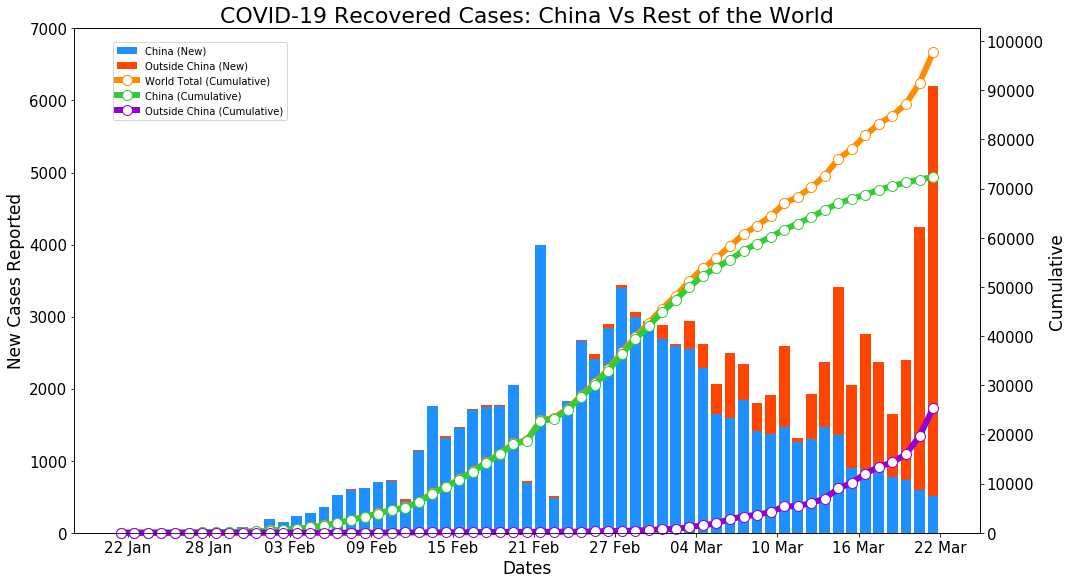

In [32]:
# Getting data for China and Oouside China
# df - Cumulative data for china, outside china and world total (deaths)
# df_newcases- new cases reported per day (deaths)
df_recovered_report = df_recovered.copy()
df_recovered_report.loc[df_recovered_report['country'] != "China","country"] = "Outside China"
df_recovered_report = df_recovered_report.groupby("country").sum().drop(["Lat","Long"],axis =1)
df_recovered_report.loc["Total"] = df_recovered_report.sum()
df_recovered_newcases = df_recovered_report.groupby(level =0).diff(axis =1)

f = plt.figure(figsize=(15,8))
ax1 = f.add_subplot(111)

ax1.bar(df_recovered_report[df_recovered_report.index == "China"].columns,df_recovered_newcases[df_recovered_newcases.index == "China"].values[0], label = "China (New)",color='dodgerblue')
ax1.bar(df_recovered_report[df_recovered_report.index == "Outside China"].columns,df_recovered_newcases[df_recovered_newcases.index == "Outside China"].values[0],bottom=df_recovered_newcases[df_recovered_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax1.set_xlabel("Dates",fontsize=17)
ax1.set_ylabel("New Cases Reported",fontsize =17)

ax1.tick_params(labelsize=15)
ax1.set_xticks(np.arange(0.5, len(df_recovered_report.columns), 6))
ax1.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_recovered_report.columns][::6],fontsize=15)
ax1.set_yticks(np.arange(0, df_recovered_newcases.max(axis = 1)[2]+1000, 1000))
# ax1.spines['bottom'].set_position('zero')

ax2 = ax1.twinx()
marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')

ax2.plot(df_recovered_report[df_recovered_report.index == "Total"].columns ,df_recovered_report[df_recovered_report.index == "Total"].values[0],**marker_style,label = "World Total (Cumulative)",color="darkorange",clip_on=False)
ax2.plot(df_recovered_report[df_recovered_report.index == "China"].columns ,df_recovered_report[df_recovered_report.index == "China"].values[0],**marker_style,label = "China (Cumulative)",color="limegreen",clip_on=False)
ax2.plot(df_recovered_report[df_recovered_report.index == "Outside China"].columns ,df_recovered_report[df_recovered_report.index == "Outside China"].values[0],**marker_style,label ="Outside China (Cumulative)",color="darkviolet",clip_on=False)
ax2.bar([0],[0])

# Label
ax2.tick_params(labelsize=15)
ax2.set_ylabel("Cumulative",fontsize =17)
ax2.set_xticks(np.arange(0.5, len(df_recovered_report.columns), 6))
ax2.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_recovered_report.columns][::6])
ax2.set_yticks(np.arange(0, df_recovered_report.max(axis = 1)[2]+10000, 10000))

f.tight_layout()
f.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Recovered Cases: China Vs Rest of the World",fontsize = 22)
plt.savefig('China vs Rest of the world2.png')
plt.show()

In [33]:
pd.DataFrame([df_confirmed_report.iloc[:,-1],df_deaths_report.iloc[:,-1],df_recovered_report.iloc[:,-1]],["Confirmed","Deaths","Recovered"]).transpose()

,Confirmed,Deaths,Recovered
country,,,
China,81397,3265,72362
Outside China,254558,11367,25342
Total,335955,14632,97704


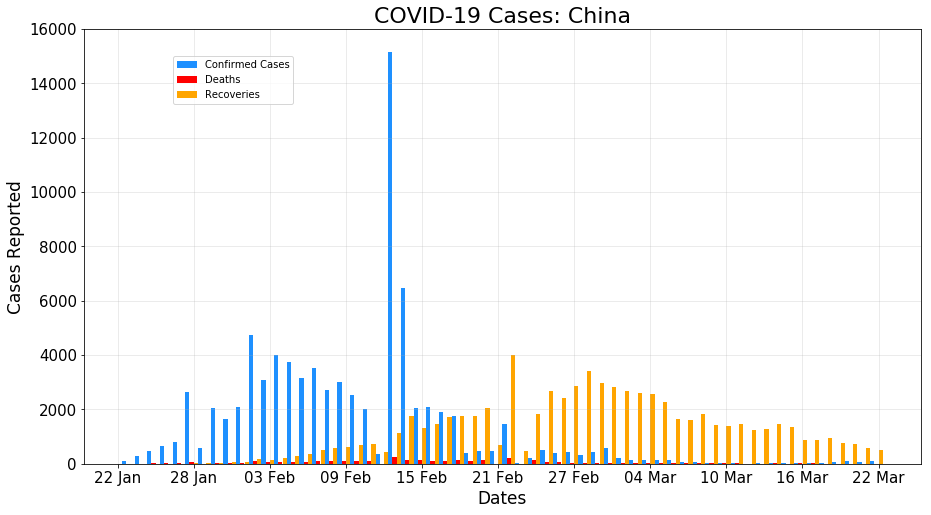

In [34]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(111)

ax.bar(np.arange(len(df_confirmed_newcases[df_confirmed_newcases.index == "China"].columns)),df_confirmed_newcases[df_confirmed_newcases.index == "China"].values[0], label = "Confirmed Cases",color='dodgerblue',width = 0.33)
ax.bar(0.33+np.arange(len(df_deaths_newcases[df_deaths_newcases.index == "China"].columns)),df_deaths_newcases[df_deaths_newcases.index == "China"].values[0], label = "Deaths",color='red',width = 0.33)
ax.bar(0.67+np.arange(len(df_recovered_newcases[df_recovered_newcases.index == "China"].columns)),df_recovered_newcases[df_recovered_newcases.index == "China"].values[0], label = "Recoveries",color='orange',width = 0.33)

# ax.bar(df_recovered_report[df_recovered_report.index == "Outside China"].columns,df_newcases[df_newcases.index == "Outside China"].values[0],bottom=df_newcases[df_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax.set_xlabel("Dates",fontsize=17)
ax.set_ylabel("Cases Reported",fontsize =17)

ax.tick_params(labelsize=15)
ax.set_xticks(np.arange(0.5, len(df_confirmed_newcases.columns), 6))
ax.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_newcases.columns][::6],fontsize=15)
ax.set_yticks(np.arange(0, df_confirmed_newcases.loc["China"].max()+2000, 2000))
ax.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Cases: China",fontsize = 22)
plt.grid(alpha = 0.3)
plt.savefig('China vs Rest of the world3.png')
plt.show()

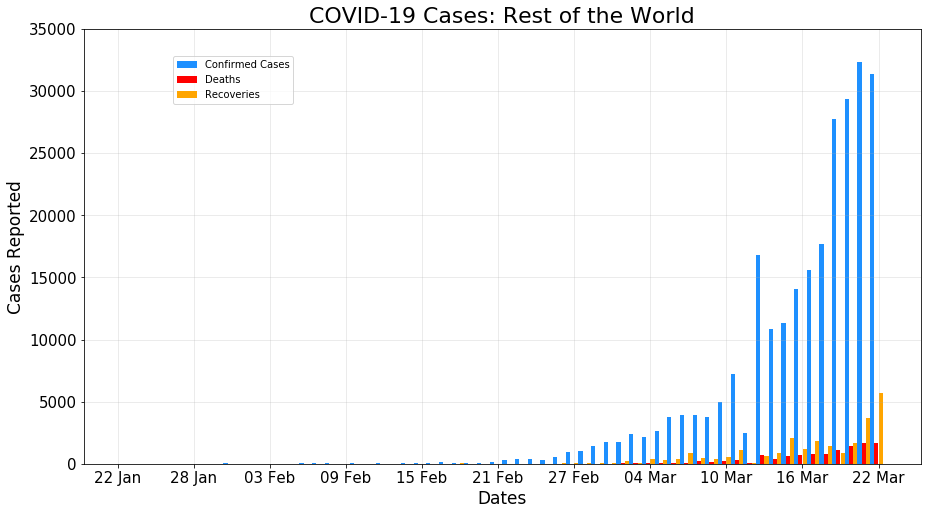

In [35]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(111)

ax.bar(np.arange(len(df_confirmed_newcases[df_confirmed_newcases.index == "Outside China"].columns)),df_confirmed_newcases[df_confirmed_newcases.index == "Outside China"].values[0], label = "Confirmed Cases",color='dodgerblue',width = 0.33)
ax.bar(0.33+np.arange(len(df_deaths_newcases[df_deaths_newcases.index == "Outside China"].columns)),df_deaths_newcases[df_deaths_newcases.index == "Outside China"].values[0], label = "Deaths",color='red',width = 0.33)
ax.bar(0.67+np.arange(len(df_recovered_newcases[df_recovered_newcases.index == "Outside China"].columns)),df_recovered_newcases[df_recovered_newcases.index == "Outside China"].values[0], label = "Recoveries",color='orange',width = 0.33)

# ax.bar(df_recovered_report[df_recovered_report.index == "Outside China"].columns,df_newcases[df_newcases.index == "Outside China"].values[0],bottom=df_newcases[df_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax.set_xlabel("Dates",fontsize=17)
ax.set_ylabel("Cases Reported",fontsize =17)

ax.tick_params(labelsize=15)
ax.set_xticks(np.arange(0.5, len(df_confirmed_newcases.columns), 6))
ax.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_newcases.columns][::6],fontsize=15)
ax.set_yticks(np.arange(0, df_confirmed_newcases.loc["Outside China"].max()+5000, 5000))
ax.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Cases: Rest of the World",fontsize = 22)
plt.grid(alpha = 0.3)
plt.savefig('China vs Rest of the world4.png')
plt.show()

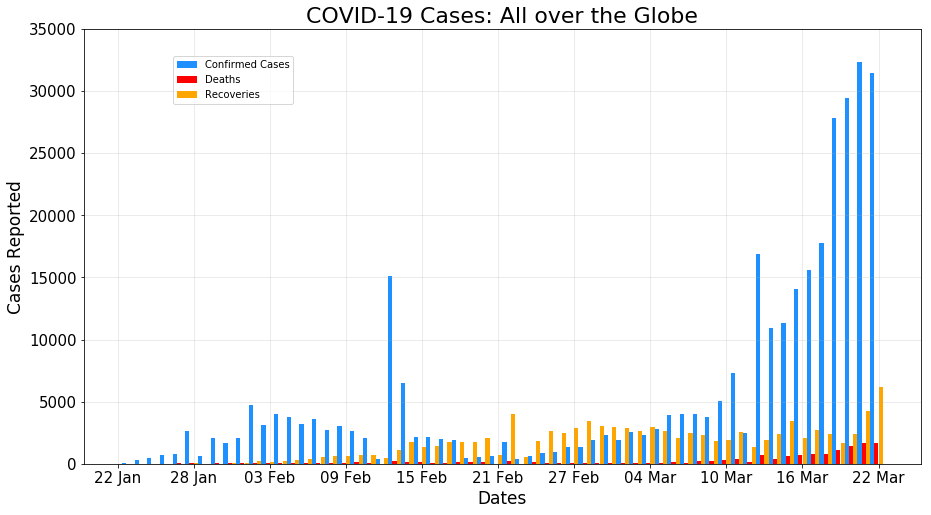

In [36]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(111)

ax.bar(np.arange(len(df_confirmed_newcases[df_confirmed_newcases.index == "Total"].columns)),df_confirmed_newcases[df_confirmed_newcases.index == "Total"].values[0], label = "Confirmed Cases",color='dodgerblue',width = 0.33)
ax.bar(0.33+np.arange(len(df_deaths_newcases[df_deaths_newcases.index == "Total"].columns)),df_deaths_newcases[df_deaths_newcases.index == "Total"].values[0], label = "Deaths",color='red',width = 0.33)
ax.bar(0.67+np.arange(len(df_recovered_newcases[df_recovered_newcases.index == "Total"].columns)),df_recovered_newcases[df_recovered_newcases.index == "Total"].values[0], label = "Recoveries",color='orange',width = 0.33)

# ax.bar(df_recovered_report[df_recovered_report.index == "Outside China"].columns,df_newcases[df_newcases.index == "Outside China"].values[0],bottom=df_newcases[df_newcases.index == "China"].values[0],label = "Outside China (New)",color='orangered')

# Labels
ax.set_xlabel("Dates",fontsize=17)
ax.set_ylabel("Cases Reported",fontsize =17)

ax.tick_params(labelsize=15)
ax.set_xticks(np.arange(0.5, len(df_confirmed_newcases.columns), 6))
ax.set_xticklabels([datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in df_confirmed_newcases.columns][::6],fontsize=15)
ax.set_yticks(np.arange(0, df_confirmed_newcases.loc["Total"].max()+5000, 5000))
ax.legend(loc = "upper left", bbox_to_anchor=(0.1,0.95))
plt.title("COVID-19 Cases: All over the Globe",fontsize = 22)
plt.grid(alpha = 0.3)
plt.savefig('China vs Rest of the world5.png')
plt.show()

# Valuable Feedback 
### **Your FEEDBACK is much APPRECIATED**
### **Please UPVOTE if you LIKE this NOTEBOOK**
### **COMMENT BELOW if you have any DOUBTS or you found any ERROR in  NOTEBOOK**